<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Pre-Read Notebook <br> (Week 3) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Large Sample Test](#z)**
    - 2.1 - **[Two Sample Z Test](#2z)**
3. **[Small Sample Test](#t)**
    - 3.1 - **[One Sample t Test](#1t)**
    - 3.2 - **[Two Sample t Test (Unpaired)](#2t)**
    - 3.3 - **[Paired t Test](#paired)**
4. **[Z Proportion Test](#prop)**
    - 4.1 - **[One Sample Test](#1_p)**
    - 4.2 - **[Two Sample Test](#2_p)** 
5. **[Chi-Square Test](#chisq)**
    - 5.1 - **[Chi-Square Test for Goodness of Fit](#goodness)**
    - 5.2 - **[Chi-Square Test for Independence](#ind)**
6. **[One-way ANOVA](#1way)**
    - 6.1 - **[Post-hoc Analysis](#post-hoc)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="z"></a>
# 2. Large Sample Test

If the sample size is sufficiently large (usually, n > 30) then we use the `Z-test`. If population standard deviation ($\sigma$) is unknown, then the sample standard deviation (s) is used to calculate the test statistic.

<a id="2z"></a>
## 2.1 Two Sample Z Test

Let us perform a two sample Z test for the population mean. We compare the means of the two independent populations. The samples are assumed to be taken from populations such that they follow a normal distribution. Also, the sample must have equal variance.

The `Shapiro-Wilk Test` is used to check the normality of the data. The assumption of equal variances of the populations is tested using the `Levene's Test`. 
The hypothesis of the Levene's test is given as:
<p style='text-indent:25em'> <strong> H<sub>0</sub>:  The variances are equal</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  The variances are not equal </strong> </p>

The `levene()` from scipy library performs a Levene's test. 

The null and alternative hypothesis of two sample Z-test is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>

Consider two normally distributed independent populations. Let us take a sample of size ($n_{1}$) from the first population with standard deviation ($\sigma_1$) and sample of size ($n_{2}$) from a second population with standard deviation ($\sigma_2$) such that $n_{1}, n_{2} > 30$. 

The test statistic for two sample Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{(\overline{X_{1}} - \overline{X_{2}})  - \mu_{0}} {\sqrt{\frac{\sigma_{1}^{2}}{n_{1}} + \frac{\sigma_{2}^{2}}{n_{2}}}}$</strong></p>

Where, <br>
$\overline{X_{1}}$, $\overline{X_{2}}$ : Mean of both the samples<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$\sigma_{1}, \sigma_{2}$: Standard deviation of both the populations<br>
$n_{1}, n_{2}$: Size of samples from both the populations

Under $H_{0}$ the test statistic follows a standard normal distribution.

If standard deviations of populations are unknown, use the standard deviations of samples ($s_{1}, s_{2}$) instead of $\sigma_{1}$ and $\sigma_{2}$ to calculate the test statistic.
i.e. <p style='text-indent:25em'> <strong> $Z = \frac{(\overline{X_{1}} - \overline{X_{2}})  - \mu_{0}} {\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$</strong></p>


### Example:

#### 1. The training institute <i>Nature Learning</i> claims that the students trained in their institute have overall better performance than the students trained in their competitor institute <i>Speak Global Learning</i>. We have a sample data of 500 students from each institute along with their total score collected from independent normal populations. Frame a hypothesis and test the Nature Learning's claim with 99% confidence.

Consider the total score for students given in the CSV file `StudentsPerformance.csv`. 

In [3]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [4]:
# consider total score of the students trained from the institute 'Nature Learning'
nl_scores = df_student[(df_student['training institute'] == 'Nature Learning')]['total score']

# number of students trained from the institute 'Nature Learning'
n_1 = len(nl_scores)

# mean total score 
nl_mean = np.mean(nl_scores)

# standard deviation of total score 
nl_std = statistics.stdev(nl_scores)

# consider total score of the students trained from the 'Speak Global Learning' institute
sgl_scores = df_student[(df_student['training institute'] == 'Speak Global Learning')]['total score']

# number of students trained from the 'Speak Global Learning' institute
n_2 = len(sgl_scores)

# mean total score 
sgl_mean = np.mean(sgl_scores)

# standard deviation of total score
sgl_std = statistics.stdev(sgl_scores)

Let us check the normality of total score for the students trained from both the institutes.

In [5]:
# perform Shapiro-Wilk test
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total score students to perform the test
stat, p_value = shapiro(df_student['total score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.998780369758606
P-Value: 0.7420849204063416


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total scores of the students trained from both the institutes are normally distributed.

Let us check the equality of variances.

In [6]:
# perform Levene's test
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total scores of students trained from 'Nature Learning' and 'Speak Global Learning' institutes to perform the test
stat, p_value = stats.levene(nl_scores, sgl_scores)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.6422721347822817
P-Value: 0.42307998325221574


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.01, for a one-tailed test calculate the critical z-value.

In [7]:
# calculate the z-value for 99% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.01
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.01), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 2.33


i.e. if z is greater than 2.33 then we reject the null hypothesis.

In [8]:
# 'ztest()' returns the test statistic and corresponding p-value
# pass the scores of students from 'Nature Learning' to the parameter, 'x1'
# pass the scores of students from 'Speak Global Learning' to the parameter, 'x2'
# pass the value in null hypothesis to the parameter, 'value'
# pass the one-tailed condition to the parameter, 'alternative'
z_score, pval = stests.ztest(x1 = nl_scores, x2 = sgl_scores, value = 0, alternative = 'larger')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  0.15125511253949914
p-value:  0.43988723840898025


In [9]:
# calculate the 99% confidence interval for the population mean
# pass the difference between the sample means to the parameter, 'loc'
# pass the scaling factor np.sqrt((nl_std^2 / n1 + (sgl_std^2 / n2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.99, loc = nl_mean - sgl_mean, 
                                                scale = np.sqrt(((nl_std**2) / n_1) + ((sgl_std**2) / n_2))))

Confidence interval: (-3.5585935666371427, 4.002593566637103)


Here the z score is less than 2.33, the p-value is greater than 0.01, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the 'Nature Learning' institute that their students perform better than the students from 'Speak Global Learning' institute is correct.

Let us plot the acceptance and rejection region for a right-tailed test with 99% confidence.

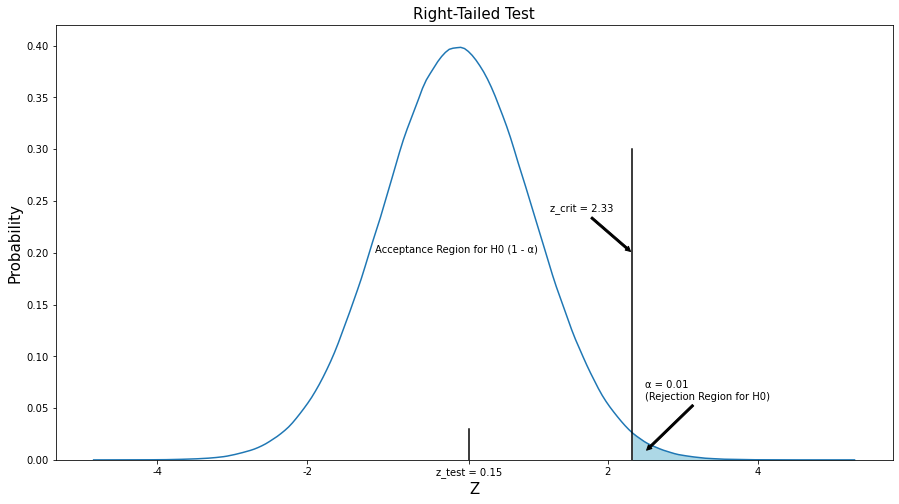

In [10]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 18)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.01
# pass the value of 'alpha' to the parameter 'q'
z = stats.norm.isf(q = 0.01)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.01\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies we fail to reject (i.e. accept) $H_{0}$.

#### 2. A study was carried out to understand amount of haemoglobin in blood for males and females. A random sample of 160 males and 180 females have means of 13 g/dl and 15 g/dl. The two samples have standard deviation of 4.1 g/dl for male donors and 3.5 g/dl for female donor . Can it be said the population means of concentrations of the elements are the same for men and women? Use  α = 0.01.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} = 0$<br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} \neq 0$

Here ⍺ = 0.01, for a two-tailed test calculate the critical z-value.

In [11]:
# calculate the z-value for 99% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' for a two-tailed test to the parameter 'q', here alpha = 0.01
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.01/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 2.58


i.e. if z is less than -2.58 or z is greater than 2.58 then we reject the null hypothesis.

In [12]:
# define a function to calculate the test statistic and corresponding p-value
# here the standard deviations for populations are unknown, thus use the sample standard deviations
# pass the sample mean, sample standard deviation and sample size for both the samples as the function input
# 'value' denotes the value in null hypothesis
def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, value, n1, n2):
    
    # calculate the test statistic
    denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
    zscore = ((samp_mean_1 - samp_mean_2) - (value)) / denominator
    
    # return the z-score
    return zscore

# given data
sm_1 = 13
sm_2 = 15
sstd_1 = 4.1
sstd_2 = 3.5
null_val = 0
n_1 = 160
n_2 = 180

# pass the given data to the function 'TwoSampZTest'
zscore = TwoSampZTest(samp_mean_1 = sm_1, 
                      samp_mean_2 = sm_2, 
                      samp_std_1 = sstd_1, 
                      samp_std_2 = sstd_2, 
                      value = null_val, 
                      n1 = n_1, n2 = n_2)

print('z-score:', zscore)

z-score: -4.806830552525058


In [13]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(Z <= z_score)
p_value = stats.norm.cdf(zscore)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 1.5334185117556497e-06


In [14]:
# calculate the 99% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.99, loc = sm_1 - sm_2, 
                                                  scale = np.sqrt((sstd_1**2/n_1) + (sstd_2**2/n_2))))

Confidence interval: (-3.0717370938718864, -0.9282629061281136)


Here the z-score is less than -2.58, the p-value is less than 0.01, also the confidence interval does not contain the value in the null hypothesis (i.e. 0). Thus, we reject the null hypothesis and conclude that both males and females have different hemoglobin averages.

<a id="t"></a>
# 3. Small Sample Test

If the sample size is small (usually, n < 30) then we use the `t-test`. These tests are also known as `exact tests`.

<a id="1t"></a>
## 3.1 One Sample t Test

Let us perform a one sample t-test for the population mean. We compare the population mean with a specific value. 

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu = \mu_{0}$ or $\mu \geq \mu_{0}$ or $\mu \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu \neq \mu_{0}$ or $\mu < \mu_{0}$ or $\mu > \mu_{0}$</strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $t = \frac{\overline{X} -  \mu_{0}}{\frac{s}{\sqrt(n)}}$</strong></p>

Where, <br>
$\overline{X}$: Sample mean<br>
$s$: Sample standard deviation<br>
$n$: Sample size
 
Under $H_{0}$ the test statistic follows a t-distribution with n-1 degrees of freedom.

### Example:


#### 1. A survey claims that in a math test female students tend to score fewer marks than the average marks of 75 out of 100. Consider a sample of 24 female students and perform a hypothesis test to check the claim with 90% confidence.

Use the dataset available in the CSV file `mathscore_1ttest.csv`.

In [15]:
# read the students performance data 
df_female_scores = pd.read_csv('mathscore_1ttest.csv')

# display the first two observations
df_female_scores.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group C,standard,none,60,72,74,206,Nature Learning
1,female,group C,standard,none,59,72,68,199,Nature Learning


In [16]:
# consider a list of math scores of female students from the data
math_marks = list(df_female_scores['math score'])

# calculate sample mean
sample_avg = np.mean(math_marks)

# calculate sample standard deviation
sample_std = statistics.stdev(math_marks)

# sample size
n = len(math_marks)

# degrees of freedom for 1 sample t-test
print('Degrees of freedom:', n - 1)

Degrees of freedom: 23


Let us check the normality of the data.

In [17]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the math scores of female students to perform the test
stat, p_value = shapiro(math_marks)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9368310570716858
P-Value: 0.13859796524047852


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the data is normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 75$<br>
H<sub>1</sub>: $\mu < 75$

Here ⍺ = 0.1 and degrees of freedom = 23, for a one-tailed test let us calculate the critical t-value.

In [18]:
# calculate the t-value for 90% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = round(stats.t.isf(q = 0.1, df = 23), 2)

print('Critical value for one-tailed t-test:', t_val)

Critical value for one-tailed t-test: 1.32


i.e. if t is less than -1.32 then we reject the null hypothesis.

In [19]:
# use 'ttest_1samp()' to calculate the test statistic and corresponding p-value for 2-tailed test
# pass the sample data to the parameter, 'a'
# pass the average value in the null hypothesis to the parameter, 'popmean'
t_stat, p_val = stats.ttest_1samp(a = math_marks, popmean = 75)

In our example, the hypothesis test is one-tailed. Thus, we divide the two-tailed probability by 2 to obtain the one-tailed probability.

In [20]:
# divide the p-value by 2
req_p_val = p_val/2

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', req_p_val)

Test Statistic: -3.6067380757023204
p-value: 0.0007426613957678669


In [21]:
# calculate the 90% confidence interval for the population mean
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
interval = stats.t.interval(0.90, df = n-1, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('90% confidence interval for population mean is', interval)

90% confidence interval for population mean is (62.399452707061236, 70.51721395960543)


We can see that the test statistic value is less than -1.32, the p-value is less than 0.1, also the confidence interval does not contain the value in the null hypothesis (i.e. 75). Thus, we reject the null hypothesis and conclude that the proposed claim, i.e. in math test female students tend to get more marks than the average marks of 75 out of 100, is correct.

#### 2. A researcher is studying the growth of bacteria in waters of Lake Beach. The mean bacteria count of 100 per unit volume of water is within the safety level. The researcher collected 10 water samples of unit volume and found the mean bacteria count to be 94.8 with a sample variance of 72.66. Does the data indicate that the bacteria count is within the safety level? Test at the α = .05 level. Assume that the measurements constitute a sample from a normal population.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 100$<br>
H<sub>1</sub>: $\mu < 100$

Here ⍺ = 0.05 and degrees of freedom = 9, for a one-tailed test let us calculate the critical t-value.

In [22]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = round(stats.t.isf(q = 0.05, df = 9), 2)

print('Critical value for one-tailed t-test:', t_val)

Critical value for one-tailed t-test: 1.83


As t-distribution is symmetric, for a left-tailed test if t is less than -1.83 then we reject the null hypothesis.

In [100]:
# define a function to calculate the t-test statistic 
# pass the population mean, sample standard deviation, sample size and sample mean as the function input
def t_test(pop_mean, samp_std, n, samp_mean):
   
    # calculate the test statistic
    t_score = (samp_mean - pop_mean) / (samp_std / np.sqrt(n))

    # return the t-test value
    return t_score

# given data
n = 10
pop_mean = 100
samp_var = 72.66 
samp_mean = 94.8

# calculate sample standard deviation
samp_std = np.sqrt(samp_var)

# calculate the test statistic using the function 't_test'
t_score = t_test(pop_mean, samp_std, n, samp_mean)
print("t-score:", t_score)

t-score: -1.9291040236750068


In [101]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(t <= t_score)
# pass the degrees of freedom to the parameter, 'df'
p_value = stats.t.cdf(t_score, df = 9)

print('p-value:', p_value)

p-value: 0.04289782134327503


In [103]:
interval = stats.t.interval(0.95, df = n-1, loc = samp_mean, scale = samp_std/np.sqrt(n))
print(interval)

(88.7022379810064, 100.89776201899359)


We can see that the test statistic value is less than -1.83, the p-value is less than 0.05. Thus, we reject the null hypothesis and can conclude that the average bacteria per unit volume (true mean) is within the safety levels.

<a id="2t"></a>
## 3.2 Two Sample t Test (Unpaired)

The two sample t-test is used to compare the means of two independent populations. This test assumes that the populations are normally distributed from which the samples are taken.

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>

Let us take a sample of size ($n_{1}$) from the first population and sample of size ($n_{2}$) from a second independent population. If both $n_{1}$ and $n_{2}$ are less than 30 and standard deviation of populations are unknown. We use two-sample t-test.

Consider the equal variance for both the populations. The test statistic for two sample t-test is given as:
<p style='text-indent:25em'> <strong> $t = \frac{(\overline{X_{1}} - \overline{X_{2}}) - \mu_{0}} {s \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}$</strong></p>

Where, <br>
$\overline{X_{1}}$, $\overline{X_{2}}$: Mean of both the samples<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$s$: Pooled standard deviation<br>
$n_{1}, n_{2}$: Size of samples from both the populations

The pooled standard deviation is defined as:
$s = \sqrt{\frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}}$ $\hspace{2cm}$  Where, $s_{1}, s_{2}$: Standard deviation of both the samples

Under $H_{0}$, the test statistic follows a t-distribution with $(n_{1}+n_{2}-2)$ degrees of freedom.

If the population variances are equal and also the sample size is the same for both the samples then the test statistic is given as:
<p style='text-indent:25em'> <strong> $t = \frac{(\overline{X_{1}} - \overline{X_{2}}) - \mu_{0}} {s \sqrt{\frac{2}{n}}}$</strong></p>

Where the pooled standard deviation $s = \sqrt{\frac{s_{1}^{2} + s_{2}^{2}}{2}}$

Under $H_{0}$, the test statistic follows a t-distribution with $(2n-2)$ degrees of freedom.

If both the population variances and the sample sizes are not equal then the Welch's test is used.

### Example: 

#### 1. The teachers' association claims that the total score of the students who completed the test preparation course is different than the total score of the students who have not completed the course. The sample data consists of 15 students who completed the course and 18 students who have not completed the course. Test the association's claim with ⍺ = 0.05.

Consider the total score of the students who have/ have not completed the preparation course are given in the CSV file `totalmarks_2ttest.csv`.

In [25]:
# read the students performance data 
df_prep_test = pd.read_csv('totalmarks_2ttest.csv')

# display the first two observations
df_prep_test.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,male,group E,standard,completed,84,83,78,245,Speak Global Learning
1,male,group C,free/reduced,completed,79,77,75,231,Speak Global Learning


In [26]:
# consider the total marks of the students who completed the test prep course
course_complete =  df_prep_test[(df_prep_test['test preparation course'] == 'completed')]['total score']

# size of first sample
n_1 = len(course_complete)

# calculate average total marks of the students who completed the test prep course
samp_avg_1 = np.mean(course_complete)

# calculate sample standard deviation 
samp_std_1 = statistics.stdev(course_complete)

# consider the total marks of the students who have not completed the test prep course
course_incomplete = df_prep_test[(df_prep_test['test preparation course'] == 'none')]['total score']

# size of second sample
n_2 = len(course_incomplete)

# calculate average total marks of the students who have not completed the test prep course
samp_avg_2 = np.mean(course_incomplete)

# calculate sample standard deviation 
samp_std_2 = statistics.stdev(course_incomplete)

# degrees of freedom for 2 sample t-test
print('Degrees of freedom:', n_1 + n_2 - 2)

Degrees of freedom: 31


Let us check the normality of the total marks of students who have/ have not completed the test preparation course.

In [27]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students who have/ have not completed the test preparation course
stat, p_value = shapiro(df_prep_test['total score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9845393300056458
P-Value: 0.9080941677093506


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total marks of students who have/ have not completed the test preparation course are normally distributed.

Let us check the equality of variances.

In [28]:
# perform Levene's test
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total scores of students who have/ have not completed the test prep course to perform the test
stat, p_value = stats.levene(course_complete, course_incomplete)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.045113770764648356
P-Value: 0.8331854285659768


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} = 0$<br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} \neq 0$

Here ⍺ = 0.05 and degrees of freedom = 31, for a two-tailed test let us calculate the critical t-value.

In [29]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = 31), 2))

print('Critical value for two-tailed t-test:', t_val)

Critical value for two-tailed t-test: 2.04


i.e. if t is less than -2.04 or greater than 2.04 then we reject the null hypothesis.

In [30]:
# use 'ttest_ind()' to calculate the test statistic and corresponding p-value for 2 sample test
# pass the sample data to the parameter, 'a' and 'b'
t_stat, p_val = stats.ttest_ind(a = course_complete, b = course_incomplete)

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: 1.4385323319823262
p-value: 0.16030339806989594


In [31]:
# calculate pooled standard deviation
s = np.sqrt((((n_1-1)*samp_std_1**2) + ((n_2-1)*samp_std_2**2)) / (n_1 + n_2 - 2))

# calculate the 95% confidence interval for the population mean
# pass the degrees of freedom to the parameter, 'df' 
# pass the difference in the sample means to the parameter, 'loc'
# pass the scaling factor s*(1/n1 + 1/n2)^(1/2) to the parameter, 'scale'
interval = stats.t.interval(0.95, 
                            df = n_1 + n_2 - 2, 
                            loc = samp_avg_1 - samp_avg_2, 
                            scale = s * np.sqrt(1/n_1 + 1/n_2))

print('95% confidence interval for population mean is', interval)

95% confidence interval for population mean is (-7.25533827425955, 41.9886716075929)


We can see that the test statistic value is less than 2.04 and greater than -2.04, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that there is no difference in the total marks of the students who have completed the preparation course and who have not completed the preparation course.

#### 2. An experiment was conducted to compare the pain relieving hours of two new medicines. Two groups of 14 and 15 patients were selected and were given comparable doses. Group 1 was given medicine 1 and group 2 was given medicine 2. The following data is obtained from the two samples. Test whether the two populations give the same mean hours of relief. Assume the data comes from normal distribution has an equal variance. Use α = 0.01

<img src='unpaired_2t.PNG'>

In [32]:
# size of first sample
n_1 = 14

# mean hours for medicine 1  
samp_avg_1 = 6.4

# standard deviation of hours for medicine 1
samp_std_1 = 1.4

# size of second sample
n_2 = 15

# mean hours for medicine 2 
samp_avg_2 = 7.3

# standard deviation of hours for medicine 2
samp_std_2 = 1.5

# degrees of freedom for 2 sample t-test
print('Degrees of freedom:', n_1 + n_2 - 2)

Degrees of freedom: 27


The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} = 0$<br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} \neq 0$

Here ⍺ = 0.01 and degrees of freedom = 27, for a two-tailed test let us calculate the critical t-value.

In [33]:
# calculate the t-value for 99% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.01
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = np.abs(round(stats.t.isf(q = 0.01/2, df = 27), 2))

print('Critical value for two-tailed t-test:', t_val)

Critical value for two-tailed t-test: 2.77


i.e. if t is less than -2.77 or greater than 2.77 then we reject the null hypothesis.

In [34]:
# calculate pooled standard deviation
s = np.sqrt((((n_1-1)*samp_std_1**2) + ((n_2-1)*samp_std_2**2)) / (n_1 + n_2 - 2))

# calculate the test statistic 
t_stat = (samp_avg_1 - samp_avg_2) / (s * np.sqrt(1/n_1 + 1/n_2))

# print the test statistic value 
print('Test Statistic:', t_stat)

Test Statistic: -1.667146701465023


In [35]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(t <= t_stat)
# pass the degrees of freedom to the parameter, 'df'
p_value = stats.t.cdf(t_stat, df = 27)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 0.10704510910964088


In [36]:
# calculate the 99% confidence interval for the population mean
# pass the degrees of freedom to the parameter, 'df' 
# pass the difference in the sample means to the parameter, 'loc'
# pass the scaling factor s*(1/n1 + 1/n2)^(1/2) to the parameter, 'scale'
interval = stats.t.interval(0.99, 
                            df = n_1 + n_2 - 2, 
                            loc = samp_avg_1 - samp_avg_2, 
                            scale = s * np.sqrt(1/n_1 + 1/n_2))

print('95% confidence interval for population mean is', interval)

95% confidence interval for population mean is (-2.395737993074164, 0.5957379930741649)


We can see that the test statistic value is greater than -2.77, the p-value is greater than 0.01, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that the two medicines have the same hours of relief.

<a id="paired"></a>
## 3.3 Paired t Test

A paired t-test is used to compare the mean of the population for two dependent samples. The dependent samples can be the scores before and after a specific treatment. 

Let $X_{i}$ be the sample before the treatment and $Y_{i}$ be the sample after the treatment. Let $\mu_{X}$, $\mu_{Y}$ be the mean of the data X and Y respectively. The mean difference $\mu_{d} = \mu_{Y} - \mu_{X}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu_{d} = \mu_{0}$ or $\mu_{d} \geq \mu_{0}$ or $\mu_{d} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{d} \neq \mu_{0}$ or $\mu_{d} < \mu_{0}$ or $\mu_{d} > \mu_{0}$</strong></p>

The test statistic for paired t-test is given as:
<p style='text-indent:25em'> <strong> $t = \frac{\overline{X_{D}} - \mu_{0}} {\frac{s_{D}}{\sqrt{n}}}$</strong></p>

Where, <br>
$\overline{X_{D}}$: Mean difference between the pairs<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$s_{D}$: Standard deviation of differences between the pairs<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a t-distribution with (n-1) degrees of freedom.

### Example:

#### 1. A training institute wants to check if their writing training program was effective or not. 17 students are selected to check the hypothesis. Consider 0.05 as the level of significance.

The writing scores before and after training are provided in the CSV file `WritingScores.csv`. 

In [37]:
# read the file containing writing scores  
df_score = pd.read_csv('WritingScores.csv')

# display the first two observations
df_score.head(2)

,score_before,score_after
0,59,50
1,62,67


In [38]:
# calculate the difference between the marks
diff_marks = df_score['score_after'] - df_score['score_before']

# calculate mean difference
mean_diff = np.mean(diff_marks)

# calculate standard deviation of difference
std_diff = statistics.stdev(diff_marks)

# sample size
n = len(df_score)

print('Degrees of freedom:', n-1)

Degrees of freedom: 16


Let us check the normality of the scores before the training.

In [39]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the writing scores of students before the training to perform the test
stat, p_value = shapiro(df_score['score_before'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9473825097084045
P-Value: 0.416460782289505


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the scores before training are normally distributed.

Let us check the normality of the score after the training.

In [40]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the writing scores of students after the training to perform the test
stat, p_value = shapiro(df_score['score_after'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9686523675918579
P-Value: 0.7944130897521973


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the scores after training are normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: The training was not effective ($\mu_{d} = 0$)<br>
H<sub>1</sub>: The training was effective ($\mu_{d} \neq 0$)

Here ⍺ = 0.05 and degrees of freedom = 16, for a two-tailed test let us calculate the critical t-value.

In [41]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = 16), 2))

print('Critical Value for two-tailed t-test:', t_val)

Critical Value for two-tailed t-test: 2.12


i.e. if t is less than -2.12 or greater than 2.12 then we reject the null hypothesis.

In [42]:
# use 'ttest_rel()' to calculate the t-statistic and corresponding p-value for paired samples
# pass the before and after scores to the function
t_stat, p_val = stats.ttest_rel(df_score['score_after'], df_score['score_before'])

# print the the t-test statistic and corresponding p-value 
print("Test Statistic:", t_stat)
print("p-value:", p_val)

Test Statistic: 1.4394882729049499
p-value: 0.16929012896279846


In [43]:
# calculate the 95% confidence interval for the population mean
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the mean of the difference to the parameter, 'loc'
# pass the scaling factor (std_diff / n^(1/2)) to the parameter, 'scale'
interval = stats.t.interval(0.95, 
                            df = n-1, 
                            loc = mean_diff, 
                            scale = std_diff/np.sqrt(n))

print('90% confidence interval for population mean is', interval)

90% confidence interval for population mean is (-3.0029069531297283, 15.708789306070905)


We can see that the test statistic value is less than 2.12 and greater than -2.12, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that the training was not effective.

#### 2. An energy drink distributor claims that a new advertisement poster, featuring a life-size picture of a well-known athlete, will increase the product sales in outlets by an average of 50 bottles in a week. For a random sample of 10 outlets, the following data was collected. Test that the null hypothesis that there the advertisement was effective in increasing sales. Test the hypothesis using critical region technique. Use α = 0.05.

Given data:

        sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
        sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

In [44]:
# sales before advertisement
sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]

# sales after advertisement
sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

# sample size
n = len(sales_before)

# calculate the difference between the sale
diff_sale = np.array(sales_after) - np.array(sales_before)

# calculate mean difference
mean_diff = np.mean(diff_sale)

# calculate the standard deviation of difference
# pass the mean difference to the parameter, 'xbar'
std_diff = statistics.stdev(diff_sale, xbar = mean_diff)

print('Degrees of freedom:', n-1)

Degrees of freedom: 8


Let us check the normality of the sales before the advertisement.

In [45]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sales before the advertisement to perform the test
stat, p_value = shapiro(sales_before)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9187208414077759
P-Value: 0.38175514340400696


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the sales before advertisement are normally distributed.

Let us check the normality of the sales after the advertisement.

In [46]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sales after the advertisement to perform the test
stat, p_value = shapiro(sales_after)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9118874073028564
P-Value: 0.3293096721172333


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the  sales after the advertisement are normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: The advertisement was not effective in increasing sales ($\mu_{d} \leq 0$)<br>
H<sub>1</sub>: The advertisement was effective in increasing sales ($\mu_{d} > 0$)

Here ⍺ = 0.05 and degrees of freedom = 8, for a one-tailed test let us calculate the critical t-value.

In [47]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = round(stats.t.isf(q = 0.05, df = 8), 2)

print('Critical Value for one-tailed t-test:', t_val)

Critical Value for one-tailed t-test: 1.86


i.e. if t is greater than 1.86 then we reject the null hypothesis.

In [48]:
# use 'ttest_rel()' to calculate the t-statistic and corresponding p-value for paired samples
# pass the after and before sales to the function
t_stat, p_val = stats.ttest_rel(sales_after, sales_before)

# print the t-test statistic and corresponding p-value 
print("Test Statistic:", t_stat)
print("p-value:", p_val)

Test Statistic: 0.10085458113185983
p-value: 0.9221477146925299


We can see that the test statistic value is less than 1.86. Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that there is no effect of advertisement.

<a id="prop"></a>
# 4. Z Proportion Test

<a id="1_p"></a>
## 4.1 One Sample Test

Perform one sample Z test for the population proportion. We compare the population proportion ($P$) with a specific value ($P_{0}$).

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P = P_{0}$ or $P \geq P_{0}$ or $P \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P \neq P_{0}$ or $P < P_{0}$ or $P > P_{0}$</strong></p>

The test statistic for proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{p -  P_{0}}{\sqrt{\frac{P_{0}(1-P_{0})}{n}}}$</strong></p>

Where, <br>
$p$: Sample proportion<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a standard normal distribution.

### Example:

#### 1. In previous years, people believed that at most 80% of male students score more than 50 marks out of 100 in Mathematics. Perform a test to check whether this percentage is more than 80. Consider the level of significance as 0.05.

Consider the sample of math scores of male students available in the CSV file `StudentsPerformance.csv`.

In [49]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [50]:
# total number of male students 
total_male = len(df_student[(df_student['gender'] == 'male')])

# consider the males with math score greater than 50
male_marks_gt_50 = df_student[(df_student['gender'] == 'male') & (df_student['math score'] > 50)]

# obtain the number of male students with math score greater than 50 
num_male_marks_gt_50 = len(male_marks_gt_50)

# calculate sample proportion
p_samp = num_male_marks_gt_50/total_male

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.8$<br>
H<sub>1</sub>: $P > 0.8$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [51]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

In [52]:
# hypothesized proportion
hypo_p = 0.8 

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / total_male)

print('Test statistic:', z_prop)

Test statistic: 4.163394160018601


In [53]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_prop)
p_value = stats.norm.sf(z_prop)

print('p-value:', p_value)

p-value: 1.5677570141208797e-05


In [54]:
# calculate the 95% confidence interval
# pass the sample proportion to the parameter, 'loc'
# pass the scaling factor (((p_samp*(1-p_samp))/n)^0.5) to the parameter, 'scale'
interval = stats.norm.interval(0.95, loc = p_samp, scale = np.sqrt((p_samp*(1-p_samp))/total_male))

print('95% confidence interval for population proportion is', interval)

95% confidence interval for population proportion is (0.8463611028151683, 0.9051916922158876)


Here the z-score is greater than 1.64, the p-value is less than 0.05, also the confidence interval does not contain the value in the null hypothesis (i.e. 0.8). Thus, we reject the null hypothesis and we have enough evidence to conclude that the percentage of male students scoring more than 50 marks in Mathematics is more than 80%.

#### 2. From a sample of 361 business owners had gone into bankruptcy due to recession. On taking a survey, it was found that 105 of them had not consulted any professional for managing their finance before opening the business. Test the null hypothesis that at most 25% of all businesses had not consulted before opening the business. Test the claim using p-value technique. Use α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.25$<br>
H<sub>1</sub>: $P > 0.25$ 

In [55]:
# sample size
n = 361

# number of business owners that did not consult before
x = 105

# sample proportion
p_samp = x / n

# hypothesized proportion
hypo_p = 0.25

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)

print('Test statistic:', z_prop)

Test statistic: 1.7928245201151534


In [56]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_prop)
p_value = stats.norm.sf(z_prop)

print('p-value:', p_value)

p-value: 0.03650049373124949


Here the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that at least 25% of all businesses had not consulted before starting the business.

<a id="2_p"></a>
## 4.2 Two Sample Test

Perform two sample Z test for the population proportion. We check the equality of population proportions $P_{1}$ and $P_{2}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P_{1} - P_{2} = P_{0}$ or $P_{1} - P_{2} \geq P_{0}$ or $P_{1} - P_{2} \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P_{1} - P_{2} \neq P_{0}$ or $P_{1} - P_{2} < P_{0}$ or $P_{1} - P_{2} > P_{0}$</strong></p>

The test statistic for two sample proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{(p_{1} -  p_{2}) - P_{0}}{\sqrt{\bar{P}(1-\bar{P})(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$   $\hspace{2 cm} \bar{P} = \frac{n_{1}p_{1} + n_{2}p_{2}}{n_{1} + n_{2}}$ </strong></p>

Where, <br>
$p_{1}, p_{2}$: Samples proportions<br>
$P_{0}$: Hypothesized proportion<br>
$\bar{P}$: Proportion of pooled sample<br>
$n_{1}, n_{2}$: Samples sizes

### Example:

#### 1. A team of nutritionists believes that each institute provides 'standard' lunch to an equal proportion of students. A sample of students from institutes <i>Nature Learning</i> and <i>Speak Global Learning</i> is given. Consider the null hypothesis as equality of proportion with 0.1 level of significance.

Consider the sample data available in the CSV file `StudentsPerformance.csv`.

In [57]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [58]:
# get the training institutes in the dataframe
df_student['training institute'].unique()

array(['Nature Learning', 'Speak Global Learning'], dtype=object)

The dataset contains the information about the students from two different institutes.

In [59]:
# consider the students from Nature Learning institute
df_nl = df_student[df_student['training institute'] == 'Nature Learning']

# number of students from first institute
n_1 = len(df_nl)

# number of the students with standard lunch
lunch_std_1 = len(df_nl[df_nl['lunch'] == 'standard'])

# consider the students from Speak Global Learning institute
df_sg = df_student[df_student['training institute'] == 'Speak Global Learning']

# number of students from second institute
n_2 = len(df_sg)

# number of the students with standard lunch
lunch_std_2 = len(df_sg[df_sg['lunch'] == 'standard'])

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} - P_{2} = 0$<br>
H<sub>1</sub>: $P_{1} - P_{2} \neq 0$ 

Here ⍺ = 0.1, for a two-tailed test calculate the critical z-value.

In [60]:
# calculate the z-value for 90% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' for a two-tailed test to the parameter 'q', here alpha = 0.1
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.1/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.64


i.e. if z is less than -1.64 or greater than 1.64 then we reject the null hypothesis.

In [61]:
# calculate test statistic value for two sample proportion test
# pass the number of students with standard lunch for both the institutes to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([lunch_std_1, lunch_std_2]), 
                                             nobs = np.array([n_1, n_2]))

# print the value of test statstic and the corresponding p-value
print('Test statistic:', z_prop)
print('p-value:', p_val)

Test statistic: 0.7935300106078008
p-value: 0.4274690915859791


In [62]:
# proportion of first sameple
p_1 = lunch_std_1/ n_1

# proportion of first sameple
p_2 = lunch_std_2/ n_2

# proportion of pooled sample
p_bar = (n_1*p_1 + n_2*p_2) / (n_1 + n_2)

# calculate the 90% confidence interval
# pass the difference in sample proportions to the parameter, 'loc'
# pass the scaling factor np.sqrt(p_bar(1-p_bar)(1/n_1 + 1/n_2)) to the parameter, 'scale'
a,b = stats.norm.interval(0.9, loc = p_1 - p_2, scale = np.sqrt(p_bar*(1-p_bar)*(1/n_1 + 1/n_2)))

print('90% confidence interval for population proportion is', interval)

90% confidence interval for population proportion is (0.8463611028151683, 0.9051916922158876)


Here the z-score is less than 1.64, the p-value is greater than 0.1, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the proportion of students with standard lunch is different.

#### 2. Steve owns a kiosk where he sells two magazines - A and B in a month. He buys 100 copies of magazine A out of which 78 were sold and 70 copies of magazine B out of which 65 were sold. Is there enough evidence to say that magazine is B is more popular? Test the claim using p-value technique with α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} \geq P_{2}$<br>
H<sub>1</sub>: $P_{1} < P_{2}$ 

In [63]:
# copies of magazine A 
num_A = 100

# copies of magazine B
num_B = 70

# number of copies sold for magazine A  
x_A = 78

# number of copies sold for magazine B 
x_B = 65

# calculate test statistic value for two sample proportion test
# pass the copies sold for both the magazines to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
# pass the one-tailed condition to the parameter, 'alternative'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([x_A, x_B]), 
                                             nobs = np.array([num_A, num_B]),  
                                             alternative = 'smaller')

# print the value of test statistic and the corresponding p-value
print('Test statistic:', z_prop)
print('p-value:', p_val)

Test statistic: -2.60830803458311
p-value: 0.004549551600547303


Here the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that there is enough evidence to say that magazine B is more popular.

<a id="chisq"></a>
# 5. Chi-Square Test

It is a non-parametric test. `Non-parametric tests` do not require any assumptions on the parameter of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers.

The chi-square test statistic follows a Chi-square ($\chi^{2}$) distribution under the null hypothesis. It can be used to check the relationship between the categorical variables. 

Let us calculate the right-tailed $\chi^{2}$ values for different levels of significance ($\alpha$).

In [64]:
# let us find the χ2-values for different alpha values with 10 degrees of freedom

# create an empty dataframe to store the alpha and corresponding χ2-value
df_χ2 = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.25, 0.1, 0.05, 0.01] 

# use for loop to calculate the χ2-value for each alpha value
for i in range(len(alpha)):
    
    # use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha' to the parameter 'q'
    # pass the 10 degrees of freedom to the parameter 'df' 
    # use 'round()' to round-off the value to 2 digits
    chi_sq = np.abs(round(stats.chi2.isf(q = alpha[i], df = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding χ2-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "χ2": chi_sq}, index = [i])

    # append the row to the dataframe 'df_χ2'
    df_χ2 = df_χ2.append(row)

# print the final dataframe
df_χ2

,alpha,χ2
0,0.25,12.55
1,0.10,15.99
2,0.05,18.31
3,0.01,23.21


Let us study the following tests:<br>
$\bullet$ Chi-square test for goodness of fit<br>
$\bullet$ Chi-square test for independence<br>
$\bullet$ Chi-square test for equality of variance

<a id="goodness"></a>
## 5.1 Chi-Square Test for Goodness of Fit

This test is used to compare the distribution of the categorical data with the expected distribution. 

<p style='text-indent:6em'> <strong> $H_{0}$: There is no significant difference between the observed and expected frequencies from the expected distribution</strong></p>
<p style='text-indent:6em'> <strong> $H_{1}$: There is a significant difference between the observed and expected frequencies from the expected distribution</strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i = 1}^{k}\frac{O_{i}^{2}}{E_{i}} - N$</strong></p>

Where, <br>
$O_{i}$: Observed frequency for category i <br>
$E_{i}$: Expected frequency for category i<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(k - p - 1)$ degrees of freedom, where k is the number class frequencies and p is the number of estimated parameters. 

**Note:** All the expected frequencies should be greater than or equal to 5. If not, add the classes such that each class will have a frequency greater than or equal to 5.

### Example:

#### 1. Check whether there is a significant difference between the observed and expected education values or not with 90% confidence. 

Consider the observed values from the performance dataset of students available in the CSV file `students_data.csv`. Consider the expected values from the demographic data given in the CSV file `demographic_data.csv`.

In [65]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


In [66]:
# read the demographic data 
df_demographic = pd.read_csv('demographic_data.csv')

# display the first two observations
df_demographic.head(2)

,education
0,bachelor's degree
1,college


The null and alternative hypothesis is:

H<sub>0</sub>: There is no significant difference between the observed and expected values. <br>
H<sub>1</sub>: There is a significant difference between the observed and expected values.

Calculate the observed values using the dataframe `df_student`.

In [67]:
# use 'value_counts()' to calculate the count for each category in the variable 'education' 
observed_value = df_student['education'].value_counts()

# observed values
observed_value

college               225
associate's degree    222
high school           197
Ph.D.                 179
bachelor's degree     118
master's degree        59
Name: education, dtype: int64

Now let us calculate the expected values using the dataframe `df_demographic`. The dataframe represents the population of the  education level of a student.

In [68]:
# use 'value_counts()' to calculate the count for each category in the variable 'education' 
exp_count = df_demographic['education'].value_counts()

# count of each category
exp_count

college               1250
associate's degree    1200
high school           1100
Ph.D.                 1050
bachelor's degree      940
master's degree        600
Name: education, dtype: int64

In [69]:
# calculate the expected values for each category
# multiply the count by sample size and divide it by total number of observations in the population
expected_value = (exp_count * len(df_student)) / len(df_demographic)

In [70]:
# create a list of observed values
print("Observed Values: ", list(observed_value))

# create a list of expected values
print("Expected Values: ", list(expected_value))

Observed Values:  [225, 222, 197, 179, 118, 59]
Expected Values:  [203.5830618892508, 195.43973941368077, 179.1530944625407, 171.0097719869707, 153.09446254071662, 97.71986970684038]


For ⍺ = 0.1 and degrees of freedom = 5, calculate the critical value.

In [71]:
# calculate the χ2-value for 90% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.1, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 9.2364


i.e. if the chi-square value is greater than 9.2364 then we reject the null hypothesis.

In [72]:
# use the 'chisquare()' to perform the goodness of fit test
# the function returns the test statistic value and corresponding p-value
# pass the observed values to the parameter, 'f_obs'
# pass the expected values to the parameter, 'f_exp'
test_stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 31.400760035000467
p-value: 7.8061673788274e-06


The above output shows that the chi-square test statistic is greater than 9.2364 and the p-value is less than 0.1, thus, we reject the null hypothesis and conclude that there is a significant difference between the observed and expected values.

#### 2. At an emporium, the manager is interested in knowing the age group which visits the mall during the day. He defines categories as - children, teenagers, adults and senior citizens. He plans to have his inventory of goods accordingly. He claims that out of all the people who visited 5% are children, 38% are teenagers, 2% are senior citizens are remaining are adults. From a sample of 180 people, it was seen that 25 were children, 50 were teenagers, 90 were adults and  15 were senior citizens. Test the manager’s claim at a 95% confidence level.


The null and alternative hypothesis is:

H<sub>0</sub>: The manager's claim is correct <br>
H<sub>1</sub>: The manager's claim is not correct

For ⍺ = 0.05 and degrees of freedom = 3, calculate the critical value.

In [73]:
# calculate the χ2-value for 90% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 7.8147


i.e. if the chi-square value is greater than 7.8147 then we reject the null hypothesis.

In [74]:
# given observed values
observed_value = [25, 50, 90, 15]

# expected count 
exp_count = [0.05, 0.38, 0.55, 0.02]

# calculate the expected values for each category
# expected_value = (np.array(exp_count) * 180) 
expected_value = [9, 68, 99, 4]

# use the 'chisquare()' to perform the goodness of fit test
# the function returns the test statistic value and corresponding p-value
# pass the observed values to the parameter, 'f_obs'
# pass the expected values to the parameter, 'f_exp'
stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', stat)
print('p-value:', p_value)

Test statistic: 64.2773321449792
p-value: 7.160266387019384e-14


The above output shows that the chi-square test statistic is greater than 7.8147 and the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that manager's claim is not correct.

<a id="ind"></a>
## 5.2 Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Consider a categorical variable `A` with `r` levels and variable `B` with `c` levels. Let us test the independence of variables A and B.

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i= 1}^{r}\sum_{j = 1}^{c}\frac{O_{ij}^{2}}{E_{ij}} - N$</strong></p>

Where, <br>
$O_{ij}$: Observed frequency for category (i,j) <br>
$E_{ij}$: Expected frequency for category (i,j)<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(r-1)(c-1)$ degrees of freedom.

### Example:

#### 1. Check if there is any relationship between the gender and education level of students with 95% confidence. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [75]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: The variables gender and education are independent<br>
H<sub>1</sub>: The variables gender and education are not independent

In [76]:
# use 'crosstab()' to create a table for each education level and corresponding gender count 
table = pd.crosstab(df_student['gender'], df_student['education'])

# observed values  
observed_value = table.values
observed_value

array([[ 91, 116,  63, 117,  94,  36],
       [ 88, 106,  55, 108, 103,  23]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 5, calculate the critical value.

In [77]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 11.0705


i.e. if the chi-square value is greater than 11.0705 then we reject the null hypothesis.

In [78]:
# use the 'chi2_contingency()' to check the independence of variables
# the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
# pass the observed values to the parameter, 'observed'
# 'correction = False' will not apply the Yates' correction
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 3.5267538812534243
p-value: 0.6193433487137843
Degrees of freedom: 5
Expected values: [[ 92.543 114.774  61.006 116.325 101.849  30.503]
 [ 86.457 107.226  56.994 108.675  95.151  28.497]]


The above output shows that the chi-square test statistic is less than 11.0705 and the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables `gender` and `education` are independent.

#### 2. A study was conducted to test the effect of the malaria parasite - plasmodium falciparum - on heterozygous and homozygous humans. The vaccine was given to a cohort of 252 humans. Test whether the heterozygous humans are better protected than homozygous. Consider 0.05 as a level of significance.

<img src='chi2_ind.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The zygote type and infection with malaria parasite is independent<br>
H<sub>1</sub>: The zygote type and infection with malaria parasite is not independent

In [79]:
# observed values  
observed_value = np.array([[93, 51], [68, 40]])

For ⍺ = 0.05 and degrees of freedom = 1, calculate the critical value.

In [80]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 3.8415


i.e. if the chi-square value is greater than 3.8415 then we reject the null hypothesis.

In [81]:
# use the 'chi2_contingency()' to check the independence of variables
# the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
# pass the observed values to the parameter, 'observed'
# 'correction = False' will not apply the Yates' correction
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

# print the output
print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 0.07023411371237459
p-value: 0.790996215494177
Degrees of freedom: 1
Expected values: [[92. 52.]
 [69. 39.]]


The above output shows that the chi-square test statistic is less than 3.8415 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the zygote type and infection of the malaria parasite are independent.

<a id="1way"></a>
# 6. One-way ANOVA

It is used to check the equality of population means for more than two independent samples. Each group is considered as a `treatment`. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the `Shapiro-Wilk Test.` Also, the population variances should be equal; this can be tested using the `Levene's Test`.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments and `N` number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $F = \frac{MTrSS}{MESS} $</strong></p>

Where,<br>
MTrSS = $\frac{TrSS}{df_{Tr}}$<br>

TrSS = $\sum_{i}^{t}\sum_{j}^{n_{i}}n_{i}(\bar{x_{i}}. - \bar{x}..)$<br> $n_{i}$ is the number of observations in $i^{th}$ treatment. <br>$\bar{x_{i}}.$ is the mean over $i^{th}$ treatment <br> $\bar{x}..$ is the grand mean (i.e. mean of all the observations). <br>

$df_{Tr}$ is the degrees of freedom for treatments (= $t-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$

$df_{e}$ is the degrees of freedom for error (= $N-t$)

Under $H_{0}$, the test statistic follows F-distribution with ($t-1,  N-t$) degrees of freedom.

Let us calculate the F values for different levels of significance ($\alpha$).

In [82]:
# let us find the F-values for different alpha values with (10,10) degrees of freedom

# create an empty dataframe to store the alpha and corresponding F-value
df_F = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.25, 0.1, 0.05, 0.01] 

# use for loop to calculate the F-value for each alpha value
for i in range(len(alpha)):
    
    # use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha' to the parameter 'q'
    # pass the (10,10) degrees of freedom to the parameter 'dfn' and 'dfd' respectively
    # use 'round()' to round-off the value to 2 digits
    f_val = np.abs(round(stats.f.isf(q = alpha[i], dfn = 10, dfd = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding F-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "F": f_val}, index = [i])

    # append the row to the dataframe 'df_F'
    df_F = df_F.append(row)

# print the final dataframe
df_F

,alpha,F
0,0.25,1.55
1,0.10,2.32
2,0.05,2.98
3,0.01,4.85


### Example:

#### 1. Total marks in aptitude exam are recorded for students with different race/ethnicity. Test whether all the races/ethnicities have an equal average score with 0.05 level of significance. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [83]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: The average score of all races/ethnicities is same<br>
H<sub>1</sub>: At least one race/ethnicity has a different average score

In [84]:
# unique race/ethnicity in the data
df_student['ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

There are total 5 unique race/ethnicity in the dataset.

In [85]:
# given data
# total marks of students from group A
gr_A = df_student[df_student['ethnicity'] == 'group A']['total_score']

# total marks of students from group B
gr_B = df_student[df_student['ethnicity'] == 'group B']['total_score']

# total marks of students from group C
gr_C = df_student[df_student['ethnicity'] == 'group C']['total_score']

# total marks of students from group D
gr_D = df_student[df_student['ethnicity'] == 'group D']['total_score']

# total marks of students from group E
gr_E = df_student[df_student['ethnicity'] == 'group E']['total_score']

#### Perform ANOVA to test the equality of means.

Let us check the normality of the total marks of students from all the groups.

In [86]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students 
stat, p_value = stats.shapiro(df_student['total_score'])

# print the p-value
print('p-value:', p_value)

p-value: 0.7420849204063416


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total marks of students from each group are normally distributed. Thus the assumption of normality is satisfied.

Let us check the equality of variances.

In [87]:
# perform Levene's test for the equality of variances 
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total scores of students from each group
stat, p_value = stats.levene(gr_A, gr_B, gr_C, gr_D, gr_E)

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.12649444001357793


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples.

In [88]:
# obtain number of unique ethnicities
t = df_student['ethnicity'].nunique()
print('t:', t)

# calculate the number of students in each ethnicity
# consider the total number of students in all ethnicities
N = df_student['ethnicity'].value_counts().sum()
print('N:', N)

t: 5
N: 1000


For ⍺ = 0.05 and degrees of freedom (= t-1, N-t) = (4, 995), calculate the critical value.

In [89]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 4, dfd = 995), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.3809


i.e. if the test statistic value is greater than 2.3809 then we reject the null hypothesis.

In [90]:
# perform one-way ANOVA
# pass the given data
f_test, p_val = stats.f_oneway(gr_A, gr_B, gr_C, gr_D, gr_E)

# print the test statistic and corresponding p-value
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 0.789109595922189
p-value: 0.5322937031083035


We can also use the `anova_lm()` in statsmodels library to perform ANOVA.

In [91]:
# perform one-way ANOVA

# fit an ols model on the datafreme 'df_student' 
# use 'Q()' to quote the variable name 
# use 'fit()' to fit the linear model
test = ols('total_score ~ Q("ethnicity")', df_student).fit()

# create table for one-way ANOVA test
# pass the linear model 'test'
# 'typ = 1' performs two-way ANOVA
anova_1 = anova_lm(test, typ = 1)

# print the table
anova_1

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""ethnicity"")",4.0,1699.671655,424.917914,0.78911,0.532294
Residual,995.0,535785.303345,538.477692,NaN,NaN


The above output shows that the test statistic is less than 2.3809 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the average score of all races/ethnicities is the same.

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Test at 5% level of significance.

<img src='1_ANOVA.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The average tensile strength due to all the machines is the same<br>
H<sub>1</sub>: The average tensile strength due to at least one machines is different

In [92]:
# given data
# tensile strength due to machine A
A = [68.7, 75.4, 70.9, 79.1, 78.2]

# tensile strength due to machine B
B = [62.7, 68.5, 63.1, 62.2, 60.3]

# tensile strength due to machine C
C = [55.9, 56.1, 57.3, 59.2, 50.1]

# tensile strength due to machine D
D = [80.7, 70.3, 80.9, 85.4, 82.3]

#### Perform ANOVA to test the equality of means.

Let us check the normality of the tensile strength of all the machines.

In [93]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [94]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strengths due to each machine
stat, p_value = stats.shapiro(df_machine['strength'])

# print the p-values for each group
print('p-value:', p_value)

p-value: 0.3721875548362732


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the tensile strengths due to all the machines are normally distributed. Thus the assumption of normality is satisfied.

Let us check the equality of variances.

In [95]:
# perform Levene's test for the equality of variances 
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strengths of each machine
stat, p_value = stats.levene(df_machine[df_machine['machine'] == 'machine_A']['strength'],
                             df_machine[df_machine['machine'] == 'machine_B']['strength'],
                             df_machine[df_machine['machine'] == 'machine_C']['strength'],
                             df_machine[df_machine['machine'] == 'machine_D']['strength'])

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.7570021212992085


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples.

Here t (=number of machines) = 4, N (=total observations) = 20 

For ⍺ = 0.05 and degrees of freedom = (t-1, N-t) = (3, 16), calculate the critical value.

In [96]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 3) to the parameter 'dfn' 
# pass the degrees of freedom (= 16) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 3, dfd = 16), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 3.2389


i.e. if the test statistic value is greater than 3.2389 then we reject the null hypothesis.

In [97]:
# perform one-way ANOVA
# pass the given data
test_stat, p_val = stats.f_oneway(df_machine[df_machine['machine'] == 'machine_A']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_B']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_C']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_D']['strength'])

# print the test statistic and p-value
print('Test statistic:', test_stat)
print('p_value:', p_val)

Test statistic: 32.03072350199285
p_value: 5.375613532781072e-07


The above output shows that the test statistic is greater than 3.2389 and the p-value is less than 0.05. Thus we reject the null hypothesis and conclude that the average tensile strength due to at least one machine is different.

<a id="post-hoc"></a>
## 6.1 Post-hoc Analysis

If one-way ANOVA rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test or `multi comparison test` is used to identify such treatment(s).

In this section, we study the `Tukey's HSD` test. The test calculates the mean difference for each pair of treatments and returns the pair(s) with different average. 

The test statistic of Tukey's HSD test is given as:
<p style='text-indent:28em'> <strong> $T_{\alpha} = q_{{\alpha},(t , f)} \sqrt{\frac{MSE}{n}} $</strong></p>

The value of $q_{{\alpha},(t , f)}$ is obtained from the tukey table.<br>
Where,<br>
t: Number of treatments<br>
f: degrees of freedom for error ($df_{e}$)<br>
MSE: Mean error sum of squares (= $\frac{ESS}{df_{e}}$ = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$)<br>
n: Number of observations in a treatment

This test is efficient when the sample size for each treatment is equal. If the sample size is not equal fo each treatment then we can use the `Scheffe test`. The `scikit_posthocs.posthoc_scheffe()` can be used to perform the test.

### Example:

#### 1. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Perform the post-hoc test to find out which machine has a different average. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [98]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [99]:
# perform tukey's range test to compare the mean efficiency for pair of machines
# pass the tensile strength to the parameter, 'data'
# pass the name of the machine to the parameter, 'groups'
comp = mc.MultiComparison(data = df_machine['strength'], groups = df_machine['machine'])

# tukey's range test
post_hoc = comp.tukeyhsd()

# print the summary table
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
machine_A,machine_B,-11.1,0.0044,-18.8842,-3.3158,True
machine_A,machine_C,-18.74,0.001,-26.5242,-10.9558,True
machine_A,machine_D,5.46,0.2265,-2.3242,13.2442,False
machine_B,machine_C,-7.64,0.0553,-15.4242,0.1442,False
machine_B,machine_D,16.56,0.001,8.7758,24.3442,True
machine_C,machine_D,24.2,0.001,16.4158,31.9842,True


The `reject=False` for pairs (machine_A, machine_D) and (machine_B, machine_C) denotes that we fail to reject the null hypothesis; and conclude that the average tensile strength due to machine_A and machine_D, machine_B and machine_C is same.

For the pairs (machine_A, machine_B), (machine_A, machine_C), (machine_B, machine_D), and (machine_C, machine_D) the average tensile strength is not the same.

The values in the columns `lower` and `upper` represent the lower and upper bound of the 95% confidence interval for the mean difference. 